# User guide for plotting Conformal Prediction metrics


In [1]:
import sys
!{sys.executable} -m pip install numpy pandas seaborn

In [2]:
# Make sure to add the code to your PYTHONPATH
import sys
sys.path.append('src')
from pharmbio.cp import metrics, plotting

Using Seaborn plotting defaults


Import the results from a Conformal predictor. 

In [3]:
import pandas as pd

df = pd.read_csv("test/resources/transporters.p-values.csv", delimiter=';')
df.columns

Index(['name', 'target', 'p-value (class -1)', 'p-value (class 1)'], dtype='object')

We do not need the 'name' column so this can be dropped

In [4]:
df = df.drop(columns=['name'])
df.shape

(233, 3)

Split the dataframe into the list of true values (`true_lab`) and the matrix of p-values (`p_vals`). Note that the true labels **must** be integer numbers starting from 0, i.e. 0,1,2 for a three-class problem.

In [5]:
true_lab = df['target'].to_numpy()
true_lab[true_lab == -1] = 0

p_vals = df.drop(columns='target').to_numpy()
p_vals.shape

(233, 2)

## Compute metrics

In [6]:
metrics.calc_error_rate(true_lab, p_vals, sign=0.25)

(0.18454935622317598, array([0.24      , 0.12037037]))

In [7]:
metrics.calc_OF(true_lab, p_vals)

0.1360179639484979

In [12]:
metrics.calc_confusion_matrix(true_lab, p_vals, sign=0.2, class_labels=[0,1])

,0,1
0,80,9
1,25,94
both,20,5
none,0,0


## Plotting calibration curve

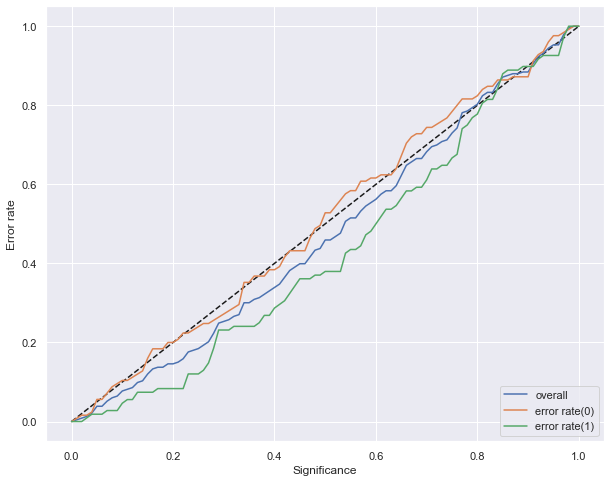

In [11]:
the_fig = plotting.plot_calibration_curve(true_lab, p_vals)